### Mlxtend 
MLxtend is a library that implements a variety of core algorithms and utilities for machine
learning and data mining. The primary goal of MLxtend is to make commonly used tools
accessible to researchers in academia and data scientists in industries focussing on userfriendly and intuitive APIs and compatibility to existing machine learning libraries, such
as scikit-learn, when appropriate. While MLxtend implements a large variety of functions,
highlights include sequential feature selection algorithms (Pudil, Novovičová, and Kittler
1994), implementations of stacked generalization (Wolpert 1992) for classification and regression, and algorithms for frequent pattern mining (Agrawal and Ramakrishnan 1994).
The sequential feature selection algorithms cover forward, backward, forward floating, and
backward floating selection and leverage scikit-learn’s cross-validation API (Pedregosa et
al. 2011) to ensure satisfactory generalization performance upon constructing and selecting feature subsets. Besides, visualization functions are provided that allow users to inspect the estimated predictive performance, including performance intervals, for different
feature subsets. The ensemble methods in MLxtend cover majority voting, stacking, and
stacked generalization, all of which are compatible with scikit-learn estimators and other
libraries as XGBoost (Chen and Guestrin 2016). In addition to feature selection, classification, and regression algorithms, MLxtend implements model evaluation techniques
for comparing the performance of two different models via McNemar’s test and multiple
models via Cochran’s Q test. An implementation of the 5x2 cross-validated paired t-test
(Dietterich 1998) allows users to compare the performance of machine learning algorithms
to each other. Furthermore, different flavors of the Bootstrap method (Efron and Tibshirani 1994), such as the .632 Bootstrap method (Efron 1983) are implemented to compute
confidence intervals of performance estimates. All in all, MLxtend provides a large variety of different utilities that build upon and extend the capabilities of Python’s scientific
computing stack. Source :[https://www.theoj.org/joss-papers/joss.00638/10.21105.joss.00638.pdf]

## Logistic regression
In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. 
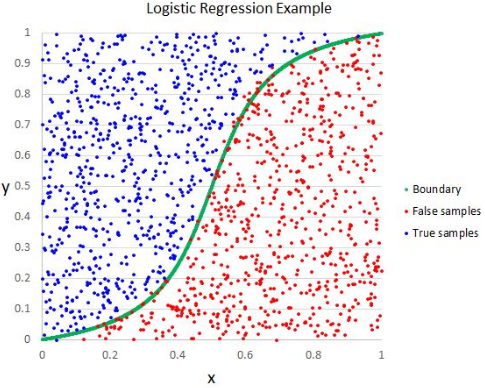

## Random forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees. 
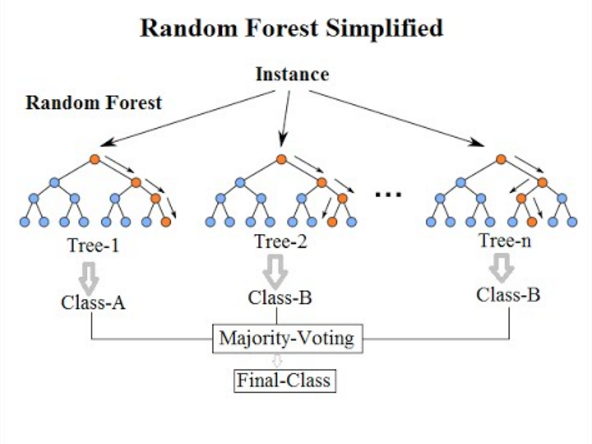

### EnsembleVoteClassifier
The EnsembleVoteClassifier is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting. ... The EnsembleVoteClassifier implements "hard" and "soft" voting.
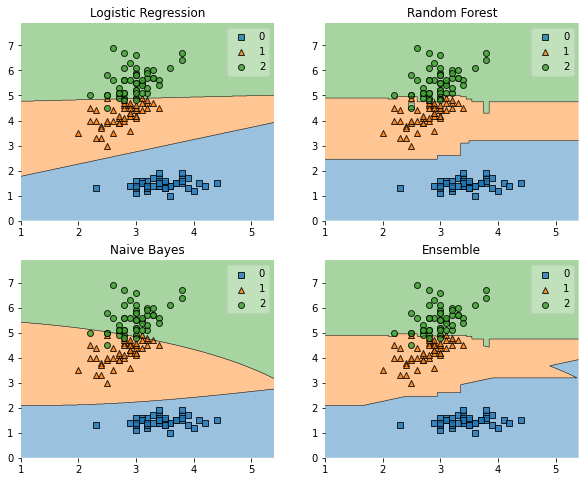

### gridspec
gridspec is a module which specifies the location of the subplot in the figure. GridSpec. specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.)

### SVC
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.
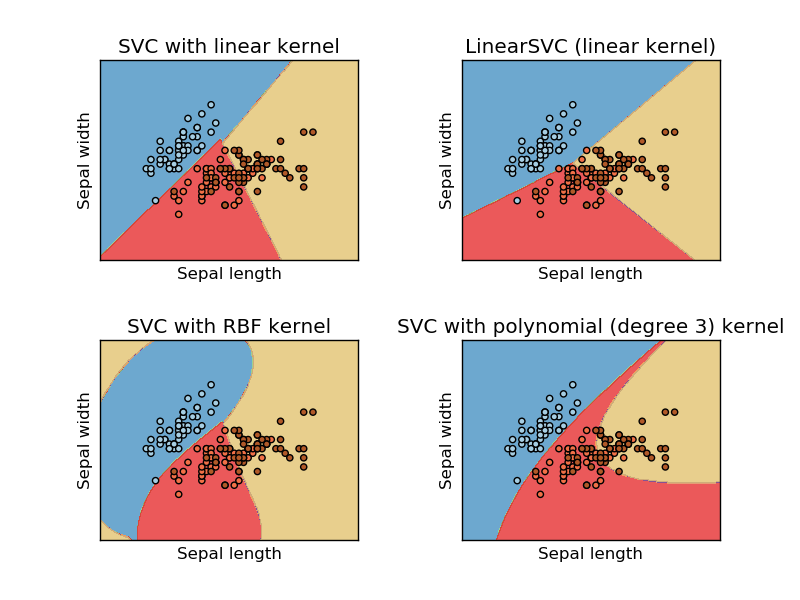

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

### Initializing Classifiers

In [2]:
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

### Loading some example data

In [3]:
X, y = iris_data()
X = X[:,[0, 2]]

### Plotting Decision Regions

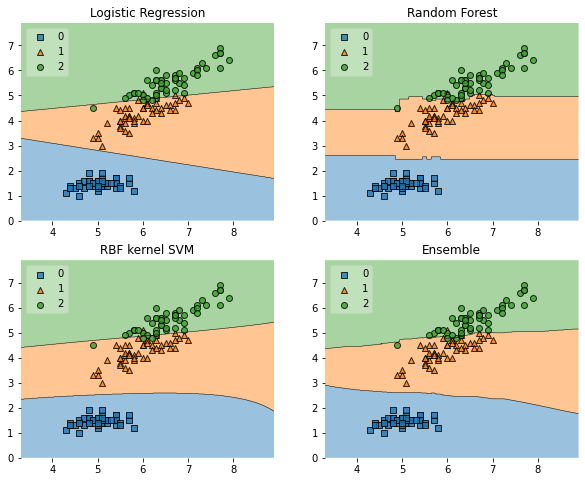

In [4]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### Hierarchical Clustering

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
sns.set()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
X, y = make_blobs(n_samples=600, centers= 5, cluster_std = 0.60, random_state = 42)

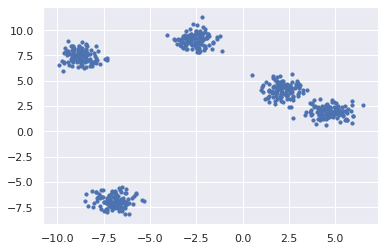

In [7]:
plt.scatter(X[:, 0], X[:, 1], s = 10)

In [8]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [9]:
distance = linkage(X, 'ward')

## Dendrogram

### What is Dendrogram?
A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

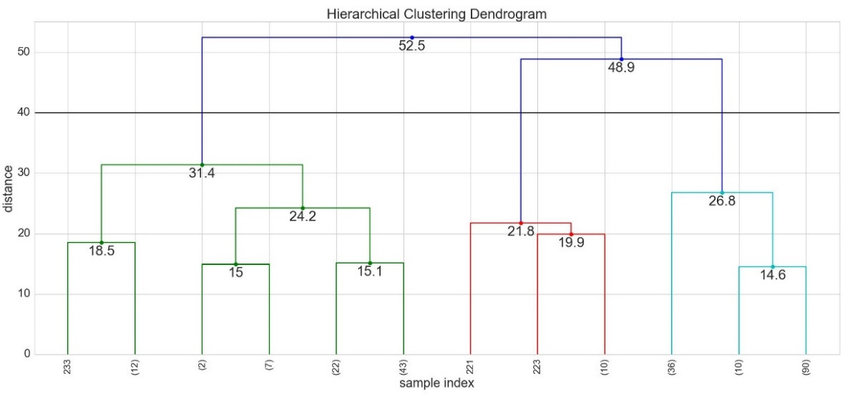

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. In the example above, we can see that E and F are most similar, as the height of the link that joins them together is the smallest. The next two most similar objects are A and B.

### Dendrogram cut-offs

The common practice to flatten dendrograms in k clusters is to cut them off at constant height k−1. Yet it leads to poorer clusters than efficiently pruning the tree.

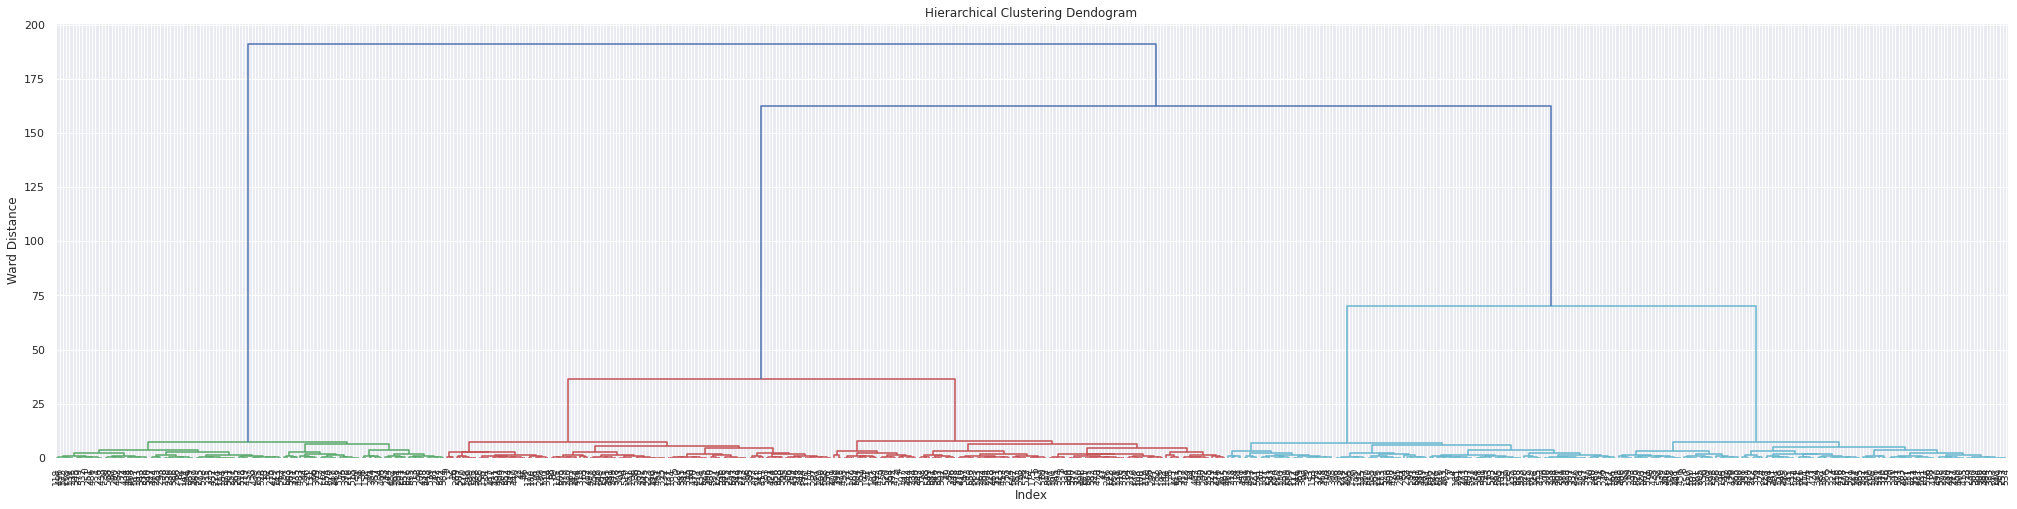

In [10]:
plt.figure(figsize = (35, 8))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel('Index')
plt.ylabel("Ward Distance")
plt.show(dendrogram(distance,
          leaf_rotation = 90,
          leaf_font_size = 9.,))

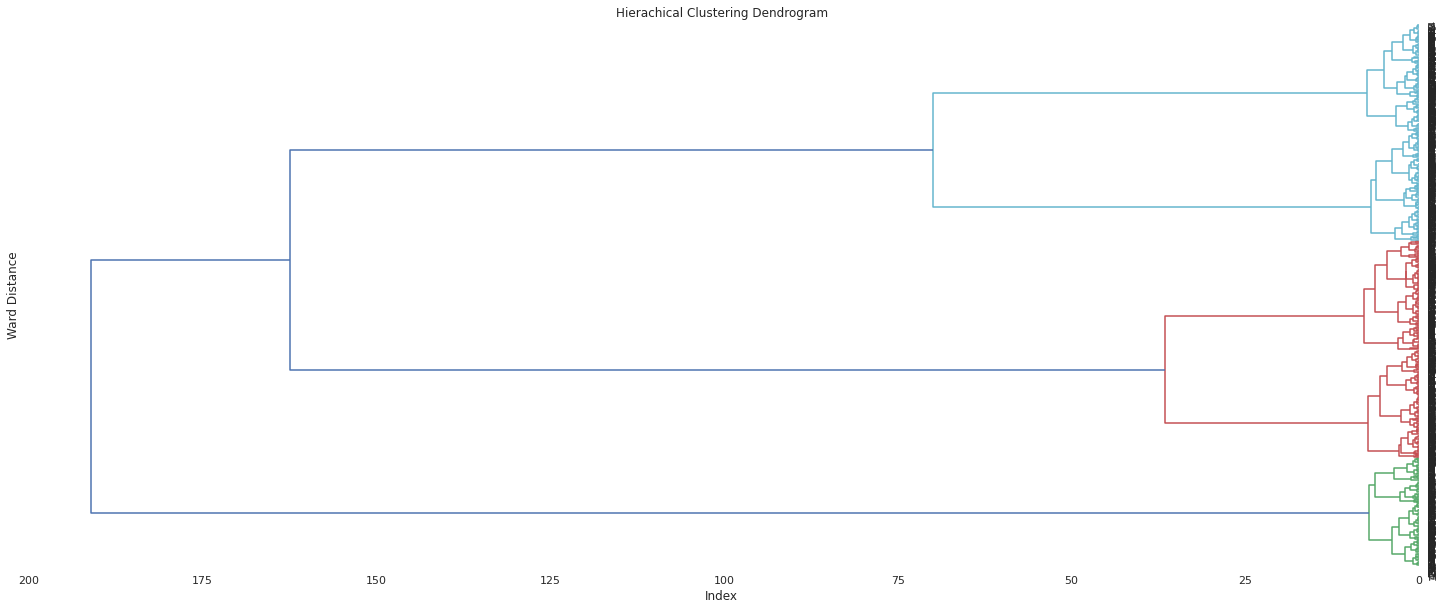

In [11]:
plt.figure(figsize=(25, 10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel('Ward Distance')
dendrogram(distance, orientation='left', leaf_rotation=90., leaf_font_size = 9.)
plt.show()

### Truncating Dendogram

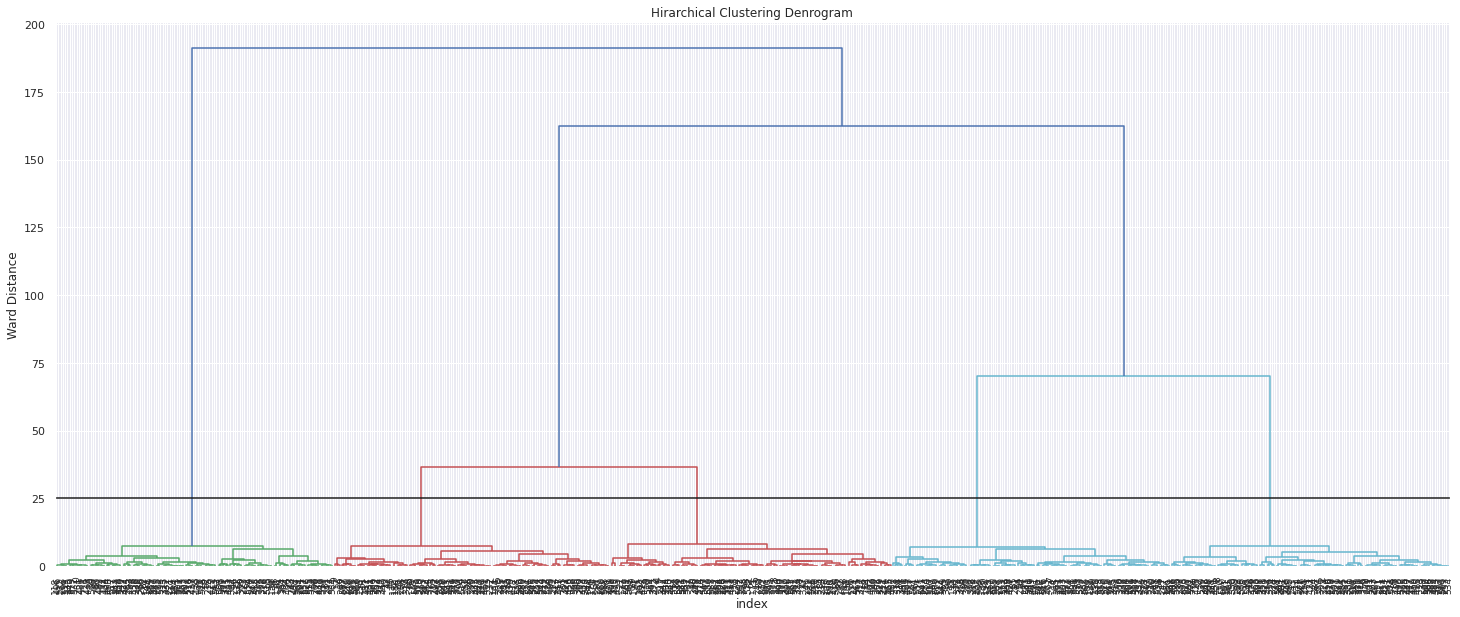

In [12]:
plt.figure(figsize=((25, 10)))
plt.title("Hirarchical Clustering Denrogram")
plt.xlabel("index")
plt.ylabel("Ward Distance")
dendrogram(distance,
          leaf_rotation=90.,
          leaf_font_size=9.,)
plt.axhline(25, c= 'k')
plt.show()

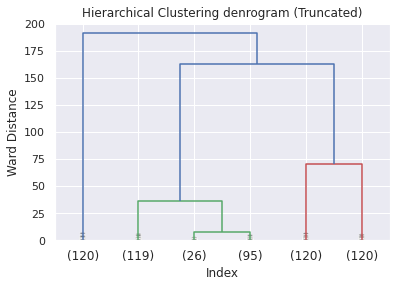

In [13]:
plt.title("Hierarchical Clustering denrogram (Truncated)")
plt.xlabel('Index')
plt.ylabel("Ward Distance")
dendrogram(distance, truncate_mode='lastp',
          p = 6, leaf_rotation=0., leaf_font_size=12., show_contracted=True);
plt.show()

### Retrieve The Clusters

### Flat Clustering
Flat clustering creates a flat set of clusters without any explicit structure that would relate clusters to each other. Hierarchical clustering creates a hierarchy of clusters. Flat clustering is efficient and conceptually simple, but it has a number of drawbacks.

In [14]:
from scipy.cluster.hierarchy import fcluster

In [15]:
max_d = 25
clusters = fcluster(distance, max_d, criterion = 'distance')

In [16]:
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

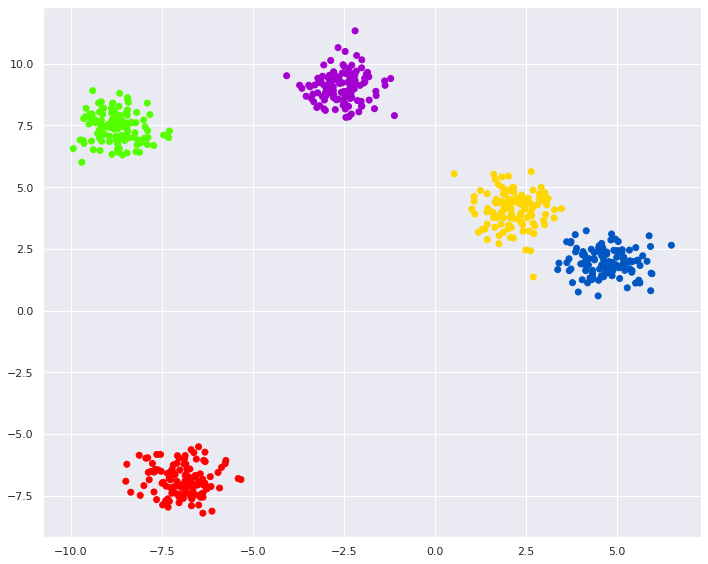

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap= 'prism')
plt.tight_layout()
plt.show()

## K-Means Clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

### K means clustering uses

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

## K-Means Clustering Advantages and Disadvantages

### K-Means Advantages :

1. If variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.
2. K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular. 

### K-Means Disadvantages :

1. Difficult to predict K-Value.
2. With global cluster, it didn't work well.
3. Different initial partitions can result in different final clusters.
4. It does not work well with clusters (in the original data) of Different size and Different density

### K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning.

### Working Procedure of K-means Clustering

1. Divides a set of samples into disjoint clusters
2. Each described by the mean of the samples in the cluster.
3. The means are commonly called the cluster “centroids”
4. Note that the centroids are not, in general, points from, although they live in the same space.
5. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion

In [18]:
from sklearn.cluster import KMeans

In [19]:
Kmeans = KMeans(n_clusters=9)
Kmeans.fit(X)

KMeans(n_clusters=9)

In [20]:
y_kmeans = Kmeans.predict(X)

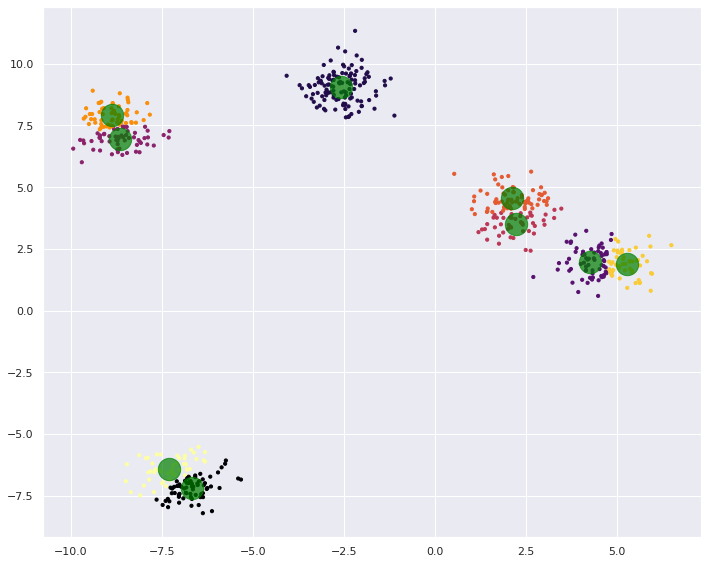

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans, s = 10, cmap = 'inferno')
centers = Kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'green', s = 500, alpha = 0.7)
plt.tight_layout()
plt.show()

In [22]:
from mlxtend.plotting import plot_decision_regions

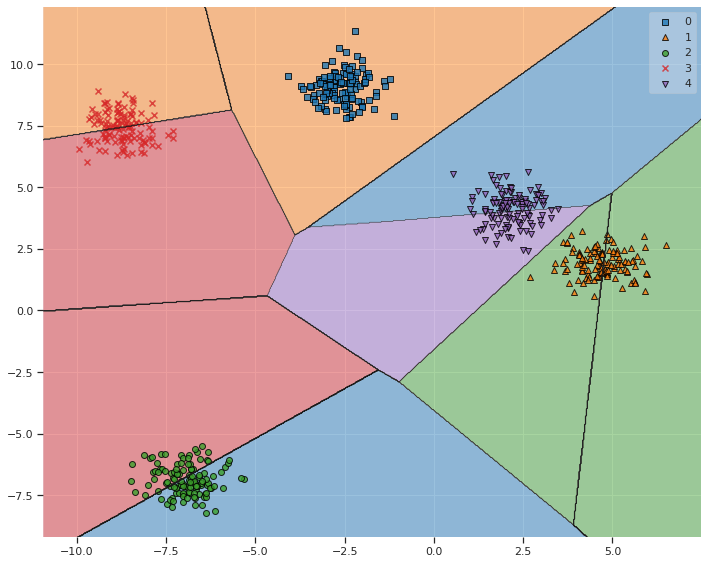

In [23]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = Kmeans)
plt.tight_layout()
plt.show()

In [24]:
Kmeans.inertia_

287.48919561258117

In [25]:
sse_ = []
for k in range(1, 8):
    Kmeans = KMeans(n_clusters = k).fit(X)
    sse_.append([k, Kmeans.inertia_])

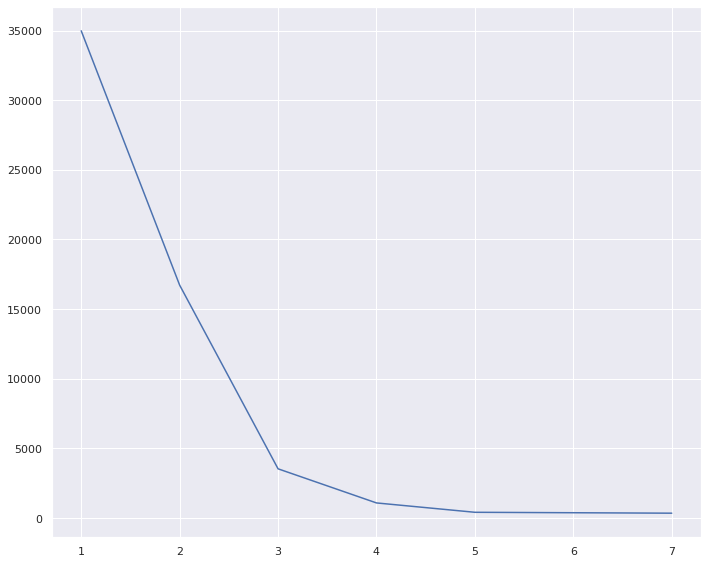

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.tight_layout()
plt.show()

In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [28]:
from itertools import cycle

In [29]:
badwidth_x = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))
meanshift_model = MeanShift(bandwidth=badwidth_x, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True)

In [30]:
cluster_centers = meanshift_model.cluster_centers_
print(cluster_centers)

[[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [31]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print(num_clusters)

5


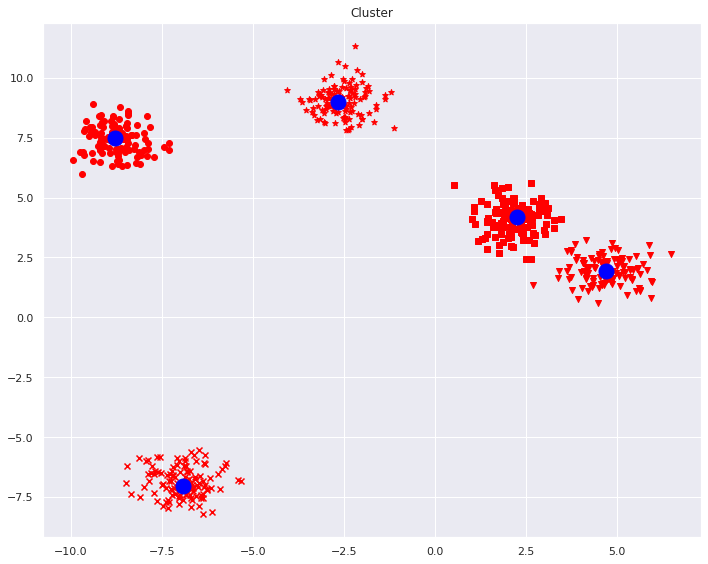

In [32]:
plt.figure(figsize = (10, 8))
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker = marker, color = 'red')
    cluster_center  = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker = 'o', 
            markerfacecolor = 'blue', markeredgecolor = 'blue', markersize = 15)
plt.title('Cluster')
plt.tight_layout()
plt.show()